# Chapter 3.5 - Functions

[Functions](https://en.wikipedia.org/wiki/Function_(computer_programming)) are another way for a programmer to control the flow of their program. They provide an [interface](https://en.wikipedia.org/wiki/Interface_(computing)) that simplifies the execution of useful code blocks.

Outside of programming, we take advantage of interfaces every day. Imagine if you had to *code* the ATM or the phone you use to text a friend. Think about the steps involved in each case:

**Getting cash from an ATM**
  1. Recognizing the card
  2. Reading the card
  3. Validating the PIN
  4. etc. etc.

**Texting a friend**
  1. Waiting for touchscreen events
  2. Getting screen coordinates of touches
  3. Translating those coordinates to letters, emojis, etc.
  4. etc., etc.
  
What we gain in simplicity, we lose in flexibility. The phone's operating system limits our interactions with its programs by providing a narrow set of possible inputs. For example, if we want to make a call, we can only use numbers and a few symbols. These inputs are called [*parameters*](https://en.wikipedia.org/wiki/Parameter_(computer_programming)) when talking about functions in Python and other programming languages. 

Imagine that you have to write code to capture numbers and symbols for a phone call. You might not even be able to start the program because you do not know how to read data or input from an interactive program. Luckily, Python has a function that can do this for us!

Let's start out by using the ```input``` function. All you need to do is provide an *argument* to place within the parentheses for ```input(......)```. Python then automatically prompts the user to provide some typed input based on your message, captures that input, and provides the values to you that you can use to define a variable.

In [1]:
number_to_call = input("Please input a phone number:")

print("Calling...", number_to_call)

Please input a phone number: 5558675309


Calling... 5558675309


Many of you provided valid input (i.e., a normal phone number). But what if someone messes up the number and tries to make a call? What tests do you think we should run to validate the phone number? 

Let's list a few possible formats of normal phone numbers using the hit 1980s song:

```
5558675309
555-867-5309
555.867.5309
555 867 5309
1-555 867 5309
```

We could go on forever! This makes it extremely difficult to validate the numbers because there are so many possible ways a person could input a phone number. Since we definitely need to make sure it is right (what if someone confesses their love, only to hear "Sir, this is a Wendy's"), all steps should be taken to throughly test the input values.

We can define general rules:

1. The input data must be numeric (let's ignore "#" for now!)
2. The input data must have 10 numbers in it



In [2]:
number_to_call = input("Please input a phone number:")

if number_to_call.isnumeric() and len(number_to_call) == 10:
    print("Calling...", number_to_call)
else:
    print("The number you are trying to reach is not in service. Please check the number and dial again!")

Please input a phone number:       sadasd 555 asda 234 asd as ff 8765


The number you are trying to reach is not in service. Please check the number and dial again!


Did anyone type in a phone number that seemed OK to you, but did not work? You might have included dashes or even spaces! This would be maddening to the person trying to make an important and timely call. Let's try to "sanitize" the input by removing common extra characters. I will provide a complex case instead of using ```input```.

This case below is challenging, because there are letters, numbers, and spaces to either keep or remove. We can use the following ```str``` functions to fix our numbers. These functions are placed at the end of a ```str``` or ```str``` variable.

1. ```.strip()```:  This removes whitespace at the beginning or end of a string
2. ```.replace(remove_str, replace_str)```: This removes any strings matching the first parameter with the second parameter.
3. ```.isdigit()```: This tests to see if a character is a number or not. The result will be ```True``` if it is a number, ```False``` otherwise.

Setting the "phone number":

In [3]:
number_to_call = "   asdasd555asdasda555 asdasdads5623   "
print(f"original number '{number_to_call}'")

original number '   asdasd555asdasda555 asdasdads5623   '


Removing leading and trailing whitespace:

In [4]:
number_to_call = number_to_call.strip()
print(f"after strip() '{number_to_call}'")

after strip() 'asdasd555asdasda555 asdasdads5623'


Replace all whitespace with an empty character:

In [5]:
number_to_call = number_to_call.replace(" ", "")
print(f"after {'.replace(" ", "")'} '{number_to_call}'")

after .replace(" ", "") 'asdasd555asdasda555asdasdads5623'


Check to see if each character is a digit or not. If it is, add it to the string, if not, ignore it 

This allows us to remove the ```is_numeric()``` test in the ```if``` statement.

In [6]:
temp_number = ""

for i in range(len(number_to_call)):

    test_char = number_to_call[i]

    if test_char.isdigit():
        temp_number = temp_number + test_char

number_to_call = temp_number

print(f"after the loop with isdigit() '{number_to_call}'")

after the loop with isdigit() '5555555623'


Looks good! Let's try the call:

In [7]:
if len(number_to_call) == 10:
    print("Calling...", number_to_call)
else:
    print("The number you are trying to reach is not in service. Please check the number and dial again!")

Calling... 5555555623


Alright! Try to see if you can find a number that should work but does not work.

In [8]:
number_to_call = input("Please input a phone number:")
number_to_call = number_to_call.strip()
number_to_call = number_to_call.replace(" ", "")

temp_number = ""

for i in range(len(number_to_call)):

    test_char = number_to_call[i]

    if test_char.isdigit():
        temp_number = temp_number + test_char

number_to_call = temp_number

if len(number_to_call) == 10:
    print("Calling...", number_to_call)
else:
    print("The number you are trying to reach is not in service. Please check the number and dial again!")

Please input a phone number:      asdd555 asdd jjfjjfjf 867 asdasda 5l3l0as9


Calling... 5558675309


This does a pretty good job. But, if we had to copy and paste it thousands or millions of times to check each number we input, that would be quite a lot of code.

Instead, we should try to place this all within a function and provide an *interface* for users of your phone system.

## Chapter 3.5.1 - Defining a function

In [18]:
def phone_call(input_number):

    input_number = input_number.strip()
    input_number = input_number.replace(" ", "")

    tmp_ = ""

    for i in range(len(input_number)):
        tmp_char = input_number[i]
    
        if tmp_char.isdigit():
            tmp_ = tmp_ + tmp_char
    
    input_number = tmp_

    return input_number

number_to_call = input("Please input a phone number:")

number_to_call = phone_call(number_to_call)
print(number_to_call)
if len(number_to_call) == 10:
    print("Calling...", number_to_call)
else:
    print("The number you are trying to reach is not in service. Please check the number and dial again!")

Please input a phone number: asdd 666 asdasd 8ddd6  7    5  sa3 ll 0asdsd 9   


6668675309
Calling... 6668675309


### Chapter 3.5.1.1 - Main parts of the function definition above:

1) **```def```** - this tells Python that what follows is a function definition
2) **```phone_call```** - after one space, the text that follows is the function name. This is much like defining a variable.
3) **```(input_number):```** - immediately after the function name, you see parentheses with text inside it. These are called *parameters*. 
4) *parameters* - these are variables that are *only* available within the function, but are required for the function to run properly. You can have no arguments ( ```funct_name()``` ) or many arguments that are separated by commas ( ```funct_name(a, b, c, d, e, f)```).
5) *indented code* - the indented code places code within the *scope* of the function. In other words, all indented code "belongs" to the function.
6) **```return input_number```** - also indented, so it belongs to the function. This line returns the result of the function back to where it was "called". In this case, it returns the value associated with the function variable ```input_number```.
7) **```number_to_call = phone_call(number_to_call)```** - the right side of this equation is an example of "calling" a function. The function call requires you to correctly name a defined function ( ```phone_call```) and to provide it with the required *parameters*. In this case, ```number_to_call``` is used to set the value of the *parameter* outside of the function. Inside the function, ```input_number``` is set to the value of ```number_to_call``` immediately when the function is called. For all indented code, ```input_number``` is now available to use just like if you explicitly defined it that way (e.g., ```input_number = number_to_call```). The left side of the equation is set equal to the result from ```return input_number```

Here is another case. Say that we want to convert temperatures in Fahrenheit to Kelvin. The equation is very basic, so it should not be a problem, right?

In [10]:
temperatures_in_f = input("Give me multiple temperatures in F with commas between them").split(",")

for temperatureF in temperatures_in_f:

    # cast from input string to float
    temperatureF = float(temperatureF)

    temperatureK = (temperatureF + 459.67) * (5/9)

    print(f"{temperatureF:.2f} F = {temperatureK:.2f} K")

Give me multiple temperatures in F with commas between them 50, 60, 70, 80


50.00 F = 283.15 K
60.00 F = 288.71 K
70.00 F = 294.26 K
80.00 F = 299.82 K


**You might ask, why should we use functions if we can just make a loop in many cases?**

1) What if you need to do that temperature conversion in multiple places?
2) You may want to test to assure that just your temperature conversion is working as expected. This requires functions to test.
3) Functions are a great way to generalize the code we create so it works in many different situations.
4) Functions can be used to limit the potential inputs to make the code more efficient and readable.

We can write a function that replaces some of the code above. This immediately makes the code look more organized.

In [11]:
def F_to_K(F):

    K = (F + 459.67) * (5/9)

    return K

temperatureF = 56.78
temperatureK = F_to_K(temperatureF)

print(f"{temperatureF:.2f} F is {temperatureK:.2f} K")

56.78 F is 286.92 K


**Main parts of the function definition above**:
1) **def** - this tells Python that what follows is a function definition
2) **F_to_K** - after one space, the text that follows is the function name. This is much like defining a variable (e.g., F_to_K = 1)
3) **(F):** - immediately after the function name, you see parentheses with text inside it. These are called *arguments*. 
4) *arguments* - these are variables that are *only* available within the function, but are required for the function to run properly. You can have no arguments ( ```funct_name()``` ) or many arguments that are separated by commas ( ```funct_name(a, b, c, d, e, f)```).
5) *indented code* - the indented code places code within the *scope* of the function. In other words, all indented code "belongs" to the function.
6) **return K** - also indented, so it belongs to the function. This line returns the result of the function back to where it was "called". In this case, it returns the variable "K" and the value to which it was set.
7) **temperatureK = F_to_K(temperatureF)** - the right side of this equation is an example of "calling" a function. The function call requires you to correctly name a defined function ( ```F_to_K```) and to provide it with the required *argument or arguments* (also called parameter or parameters). In this case, ```temperatureF``` is used to set the value of the *argument* variable named F. In this case, F is now set to 56.78 immediately when the function is called. For all indented code, ```F = 56.78``` is now available to use just like if you explicitly defined it that way. The left side of the equation is set equal to the result from **return K**

## Chapter 3.5.2 - Putting it all together

We can use both functions and loops to convert many numbers in the exact same way.

Run the following code. You will notice that the numbers are different every time due to the random number generator.

This shows that this approach:

1) can convert any float from F to K and then print it out.
2) can do this with millions of numbers.

In [12]:
def F_to_K(F):

    K = (temperatureF + 459.67) * (5/9)

    return K

# iterate through every 5th int between 0 and 100
for temperatureF in range(0, 105, 5):

    temperatureK = F_to_K(temperatureF)

    print(f"{temperatureF:.2f} F is {temperatureK:.2f} K")

0.00 F is 255.37 K
5.00 F is 258.15 K
10.00 F is 260.93 K
15.00 F is 263.71 K
20.00 F is 266.48 K
25.00 F is 269.26 K
30.00 F is 272.04 K
35.00 F is 274.82 K
40.00 F is 277.59 K
45.00 F is 280.37 K
50.00 F is 283.15 K
55.00 F is 285.93 K
60.00 F is 288.71 K
65.00 F is 291.48 K
70.00 F is 294.26 K
75.00 F is 297.04 K
80.00 F is 299.82 K
85.00 F is 302.59 K
90.00 F is 305.37 K
95.00 F is 308.15 K
100.00 F is 310.93 K


## Chapter 3.5.3 - Application: Law of Large Numbers

**[Inferential statistics](https://en.wikipedia.org/wiki/Statistical_inference)**

One major assumption when using *inferential* statistical approaches is that a sample of observations can be used to make generalizations about the overall population of observations. For example, you might survey 10 students in EAE 493 and find that 8 are tired. You might then infer that 24 students (~80%) of the class is tired. This is useful because we may not be able to survey everyone in the class in a reasonable amount of time.

**Inferential statistics in climatology**

This same concept applies to climatology. When we record an observation of high temperatures on one sunny August day, we might start to make inferences about all August days. If we then make an observation of a high temperature on a rainy day, our inferential model of August days based on one sunny day observation might seem wildly inaccurate:

| August date | High Temperature | Inference                   | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               | August days have highs of 85|   -   |
| 08/02/1991  | 65               | August days have highs of 65|  20 F |

If we continue to seesaw between what happened just on the previous day, our statistical model will be hopelessly chasing a moving target:

| August date | High Temperature | Inference                   | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 65|  10 F |

However, if we use the *mean* of August days, we can start to create a more useful model that blends what we know about multiple August days:

| August date | High Temperature | Inference (mean)            | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 75|  0  F |

Of course, nature does not always play nicely:

| August date | High Temperature | Inference (mean)            | Error |
| ----------- | ---------------- | ----------------------------| ----- |
| 08/01/1991  | 85               |             -               |   -   |
| 08/02/1991  | 65               | August days have highs of 85|  20 F |
| 08/03/1991  | 75               | August days have highs of 75|  0  F |
| 08/04/1991  | 100              | August days have highs of 75|  25  F|

**The importance of climate science (domain) knowledge**

We can use our knowledge of climate to know that August temperatures have a tendency to be relatively warm. We can draw this conclusion in two ways:
1) Experience -- we know the location well and have expectations of August high temperatures.
2) Energy Balance Models -- we understand the physics behind balancing insolation and terrestrial radiation and how relatively high solar angles in August would result in a higher equilibrium temperature during August afternoons.

**Temperature distributions**

We would not expect a high of 32, nor would we expect a high of 150. This suggests that the *distribution* of temperatures is not random. Furthermore, even high temperatures within the range of what is possible (e.g., 50 or 110) intuitively seem less likely to occur than other high temperatures (e.g., 80). This suggests that the distribution of August temperatures has a *central tendency* with *outliers* both above and below. In other words, the *mean* of all observations might have a relatively high probability of being the actual observation. But how do you determine these values?

**Large numbers**

Going back to the survey on tired students in class, we intuitively know that if we ask too few people if they are tired, this may not be representative of the entire class. Student Alex might always be tired. So if he is the only survey respondant, we might assume 100% of the class is tired. In other words, *sample size* matters, and a sufficient amount of observations is needed to produce a useful inferential model.

**Climate Normals**

We generally report long-term averages of various weather observations based on 30 years of data. We can simulate *why* this is important in the following code.

First, we can define a random number generator that can produce a distribution of values (e.g., temperatures). Modify the **parameters** of the ```get_random_floats``` call to get different numbers.

In [13]:
import random

def get_random_floats(mean_value, std_value, count):
    
    random_numbers = []

    for i in range(count):
    
        random_float = random.gauss(mu=mean_value, sigma=std_value)

        random_numbers.append(random_float)

    return random_numbers

random_floats = get_random_floats(80, 10, 5)

print(random_floats)

[77.13645427983894, 103.74044681482222, 77.44062059532749, 74.64162209103554, 73.43229756637668]


Next, we can create a function that calculates the mean of a list. Change the values in the list to get a different mean.

In [14]:
def get_mean_of_list(list_name):
    return sum(list_name) / len(list_name)
   
a = [75, 85, 95, 105]

a_mean = get_mean_of_list(a)

print(f"mean of {a} is {a_mean}")

mean of [75, 85, 95, 105] is 90.0


Finally, we can use both functions to simulate how a different count of years used to calculate normals could influence the accuracy of that statistic.

If the actual normal temperature in August is 80 F, and the standard deviation of August temperatures is 6 F, we can simulate potential August temperatures you might see in 1 year, 5 years, 10 years, or 30 years:

In [15]:
aug_climate_mean = 80
std_of_aug_temperatures = 6

print("Mean of normal distribution is:", aug_climate_mean, "st.d. is:", std_of_aug_temperatures)

for count_of_numbers in [1, 5, 10, 30]:

    random_floats = get_random_floats(aug_climate_mean, std_of_aug_temperatures, count_of_numbers)

    random_float_mean = get_mean_of_list(random_floats)

    print(f"The mean temperature of the list is: {random_float_mean:.2f} for {count_of_numbers:d} August mean temperatures")

Mean of normal distribution is: 80 st.d. is: 6
The mean temperature of the list is: 81.90 for 1 August mean temperatures
The mean temperature of the list is: 83.19 for 5 August mean temperatures
The mean temperature of the list is: 81.74 for 10 August mean temperatures
The mean temperature of the list is: 77.61 for 30 August mean temperatures


**Experiment**

1) Change ```std_of_aug_temperatures```. What do you notice about the results?
2) Change ```aug_climate_mean```. What do you notice about the results?
3) Add larger numbers to this list: ```for count_of_numbers in [1, 5, 10, 30]:```. Compare the results of small counts to large counts.

**Normal Distributions**

The above example randomly generates numbers based on defining a *known* distribution around a mean defined by ```aug_climate_mean``` and ```std_of_aug_temperatures```. This simulates a situation where we know the actual distribution of August temperatures. In reality, we are just slowly building statistical confidence with each year of August observations. Our job will never be complete! In fact, *nonstationarity* may make what we know about August temperatures irrelevant as we experience the influence of climate change on those values.

The following plot visualizes the above example. Modify the standard deviation and mean to see how this changes the plot:

NOTE: Make sure you have run all of the code examples in **Chapter 3.5.3** before you run this code block.

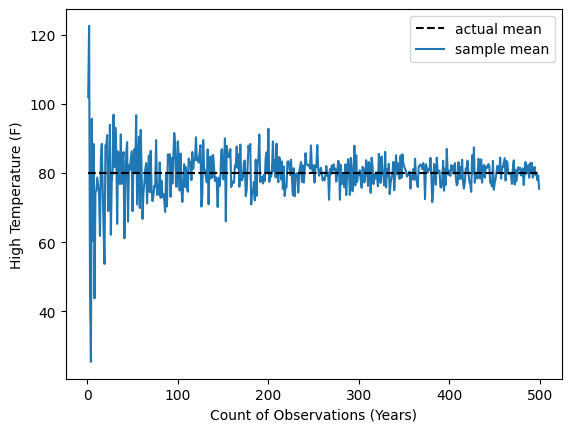

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

aug_climate_mean = 80
std_of_aug_temperatures = 60
observation_count_range = range(1, 500)

plt.plot(observation_count_range, [aug_climate_mean]*len(observation_count_range), 'k--', label='actual mean', zorder=10)
plt.ylabel("High Temperature (F)")
plt.xlabel("Count of Observations (Years)")

mean_result = []

for count_of_numbers in observation_count_range:

    random_floats = get_random_floats(aug_climate_mean, std_of_aug_temperatures, count_of_numbers)

    random_float_mean = get_mean_of_list(random_floats)

    mean_result.append(random_float_mean)

plt.plot(observation_count_range, mean_result, '-', label='sample mean')

plt.legend()

**Experiment**

1) Change ```std_of_aug_temperatures```. What do you notice about the plot?
2) Change ```aug_climate_mean```. What do you notice about the plot?
3) Does adding more years help? At what point are there diminishing returns?